For this lab I tried to use my voting classifier idea to combine my best model (gradient boost from sklearn) with the Jeremy's model that got the best score. I assigned more weight to Jeremy's model in this votingclassifier. This resulted in a slightly lower score than Jerermy's (0.85955), and hence was not an improvement.

In [ ]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn import cross_validation
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV


df = pd.read_csv('inclasskaggle/train_final.csv', index_col= 0, na_values='?')
df = df.fillna(df.mean(axis = 0))

df_test = pd.read_csv('inclasskaggle/test_final.csv', index_col= 0, na_values='?')
df_test = df_test.fillna(df_test.mean(axis=0))

X_train = df.drop('F26',1).drop('F6',1).drop('Y',1)
y_train = df.Y

X_test = df_test.drop('F26',1).drop('F6',1)

X_train = VarianceThreshold(1.3).fit_transform(X_train)
X_test = VarianceThreshold(1.25).fit_transform(X_test)

xgbmodel = xgb.XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.01, min_child_weight=5, gamma=.8, subsample=.4, reg_alpha=.5, colsample_bytree=.4,reg_lambda=.93)
xgbmodel.fit(X_train, y_train)
print("Making prediction and saving results...")
preds = xgbmodel.predict_proba(X_test)[:,1]


#param_grid = [
#    {'n_estimators': [1000],
#    'learning_rate':[0.01],
#    'max_depth': [2,3,4],
#    'min_samples_split': [10,15]},
#]

#cv = 5
#gb_clf = GridSearchCV(GradientBoostingClassifier(),
#                   param_grid=param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')
#gb_clf.fit(X_train,y_train)

#print(gb_clf.best_params_)
#print(gb_clf.best_score_)

params = {'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 10,
          'learning_rate': 0.01}
gbc = GradientBoostingClassifier(**params)
gbc.fit(X_train, y_train)

print("gbc done")

eclf = VotingClassifier(estimators=[('gbc',gbc),('xgbmodel',xgbmodel)],weights=[1,3], voting='soft')
print("start fit")
eclf.fit(X_train,y_train)
print("start pred")
predicts = eclf.predict_proba(X_test)


solution = pd.DataFrame({'id':df_test.index, "Y":predicts[:,1]})
solution.to_csv("inclasskaggle/vcsubmission.csv", index = False)

However, I had found that some features are highly correlated:

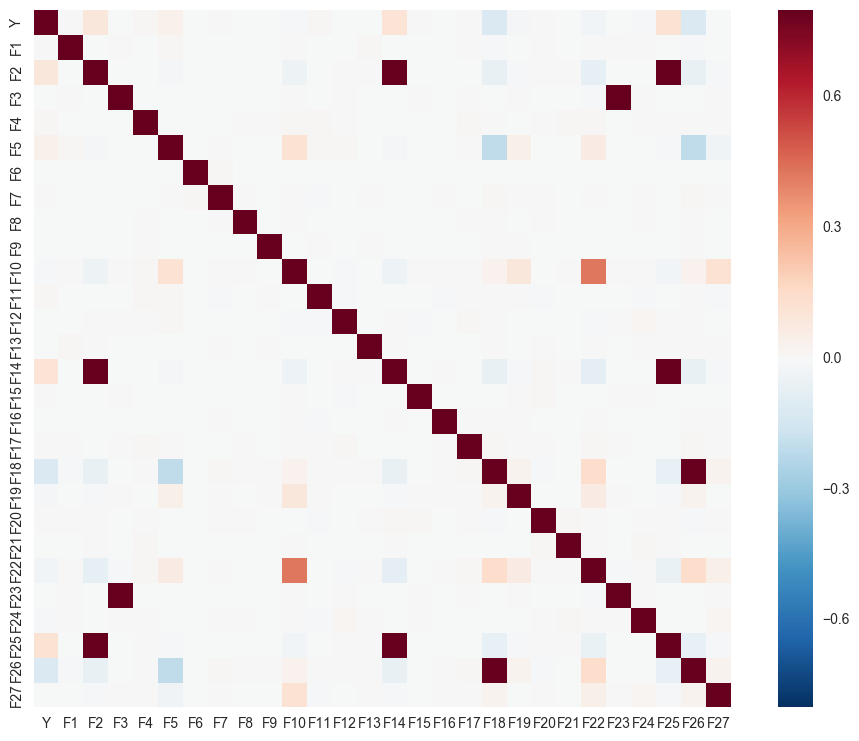

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
pd.set_option('display.notebook_repr_html', False)
%matplotlib inline
plt.style.use('seaborn-white')

df = pd.read_csv('train_final.csv', index_col= 0, na_values='?')
df = df.fillna(df.mean(axis = 0))
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

And based on Rohan's post, these features are noisy: F1, F6, F11, F12, F13, F16, F17, F18
$$ $$

Hence this time I decided to use Jeremy's model but extracting features F6 and F18. This resulted in a better score: 0.85977

In [ ]:
X_train = df.drop('F6',1).drop('F18',1).drop('Y',1)
y_train = df.Y

X_test = df_test.drop('F6',1).drop('F18',1)


X_train = VarianceThreshold(1.3).fit_transform(X_train)
X_test = VarianceThreshold(1.25).fit_transform(X_test)

xgbmodel = xgb.XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.01, min_child_weight=5, gamma=.8, subsample=.4, reg_alpha=.5, colsample_bytree=.4,reg_lambda=.93)
xgbmodel.fit(X_train, y_train)
print("Making prediction and saving results...")
preds = xgbmodel.predict_proba(X_test)

solution = pd.DataFrame({'id':df_test.index, "Y":predicts[:,1]})
solution.to_csv("inclasskaggle/vcsubmission.csv", index = False)
